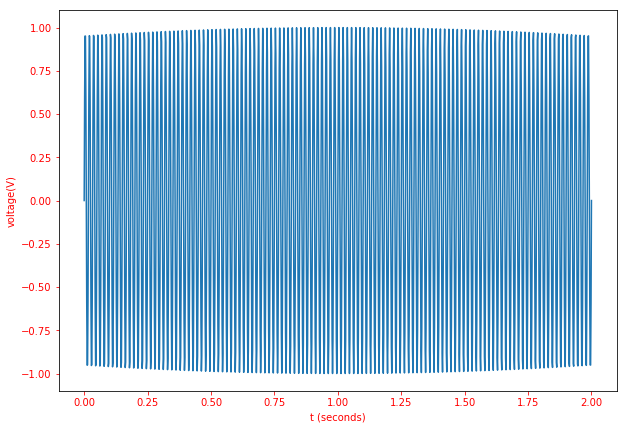

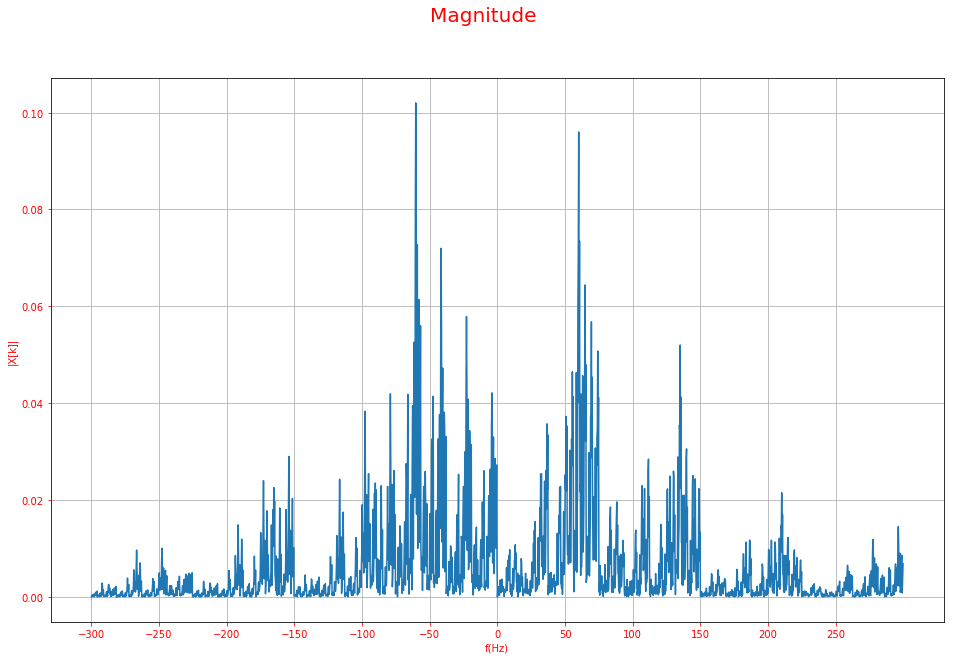

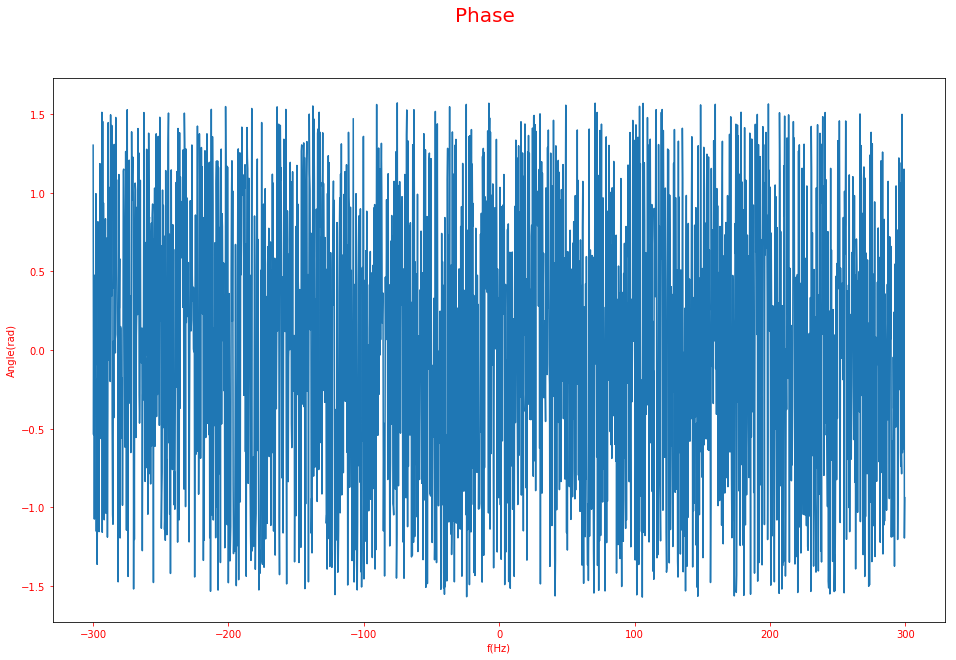

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
#Python signal generator. 
#budget matlab

class Signal(object):
    f =1
    a=1
    shift=0
    Fs=60
    h=2
    T = 4
    wtype = 0
    otype = 0
    NPoint = 16
    out = np.zeros(NPoint, dtype=np.complex_)
    def __init__(self,freq,amplitude,shift):
        self.f=freq
        self.a=amplitude
        self.shift= (shift / 180)*np.pi
        
    def fig(self):
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
        plt.xlabel('t (seconds)')
        plt.ylabel('voltage(V)')

    def fsi(self,x):
        value = 0.0
        x = (x - self.shift)
        value = self.a*np.sin(2*np.pi*self.f*x)
        return value
    def fsq(self,x):    
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + (np.sin(2 * np.pi * self.f * x * (2 * h - 1))/(2 * h - 1))
        value *= (self.a*( 4 / np.pi))
        return value
    def fst(self,x):
        value = 0.0
        h= self.h
        x = (x - self.shift)
        for h in range(1, h):
            value = value + ((-1)**(h+1))*(np.sin(2 * np.pi * self.f * x * (2 * h - 1))/(((2 * h) - 1)*((2 * h) - 1)))
        value *= self.a*( 8 / ((np.pi)**2))
        return value
    def fss(self,x):
        value = 0.0
        h = self.h
        x = (x - self.shift)
        for h in range(1,h):
            value = value + (np.sin(2 * np.pi * x * self.f * h ) / h)*((-1)**h)
        value *= (-2 / np.pi)*self.a
        return value
    def sinefit(self, a, x, b, c, d):
        return a*np.sin(b*x + c) + d
    def sine(self, Fs): 
        self.Fs=Fs
        self.wtype = 0
        self.fig()
        x = np.linspace(0,self.T,self.Fs*self.T)
        plt.plot(x, self.fsi(x))
        plt.show()
        if self.otype == 1:
            self.out = self.fsi(x)
    def square(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 1
        x = np.linspace(0,self.T, self.Fs*self.T)
        self.fig()
        plt.plot(x, self.fsq(x))   
        plt.show()
        if self.otype == 1:
            self.out = self.fsq(x)
                                                      
    def triangle(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 2
        x = np.linspace(0,self.T, self.Fs*self.T)
        self.fig()
        plt.plot(x, self.fst(x))
        plt.show()
        if self.otype == 1:
            self.out = self.fst(x)
        
    def sawtooth(self, Fs, Harmonics):
        self.Fs = Fs
        self.h = Harmonics
        self.wtype = 3
        x = np.linspace(0,self.T, self.Fs*self.T)
        self.fig()
        plt.plot(x, self.fss(x))
        plt.show()
        if self.otype == 1:
            self.out = self.fss(x)
        
    def op(self, wtype, x):
        if (wtype == 0):
            return self.fsi(x)
        elif (wtype == 1):
            return self.fsq(x)
        elif (wtype == 2):
            return self.fst(x)
        elif (wtype == 3):
            return self.fss(x)
    
    def multiply(self, sig):
        self.fig()
        x1 = np.linspace(0, self.T, self.Fs)
        x2 = np.linspace(0, self.T, sig.Fs)
        plt.plot(x1, self.op(self.wtype, x1) * sig.op(sig.wtype,x2))
        if self.otype == 1:
            self.out = self.op(self.wtype, x1) * sig.op(sig.wtype,x2)
    
    def add(self,sig):
        self.fig()
        x= np.linspace(0, self.T, self.Fs)
        plt.plot(x, self.op(self.wtype,x) + sig.op(sig.wtype,x))
        if self.otype == 1:
            self.out = self.op(self.wtype,x) + sig.op(sig.wtype,x)
    
    def subtract(self, sig):
        self.fig()
        x = np.linspace(0, self.T, self.Fs)
        plt.plot(x, self.op(self.wtype,x) - sig.op(sig.wtype,x))
        if self.otype == 1:
            self.out = self.op(self.wtype,x) - sig.op(sig.wtype,x)
            
    def binsize(self, pointdft, returnarray): #NPointDft, and option to write to/supress output array for FFT.
        self.NPoint = pointdft
        if (returnarray == 0): #Supresses output stored to array.
            self.otype = 0
        else:#Sets an output array.
            self.otype = 1
            self.out = np.zeros(self.NPoint,dtype=np.complex_)
    def time(self,T):
        self.T = T

class Modulation(Signal):
    m = 1
    fshift = np.array([])
    def __init__(self, centerFreq, amplitude, m):
        self.f = centerFreq
        self.a = amplitude
        self.wtype = 0
        self.m = m
    def modindex(self,modindex):
        self.m = modindex
    def AM(self, sig):
        self.fig()
        self.T=sig.T
        x = np.linspace(0, self.T, sig.Fs*self.T)
        if (self.wtype == 0):
            plt.plot(x, (1/2)*((self.m*sig.op(sig.wtype,x))+1)*np.cos(2*np.pi*x*self.f)*self.a)
            if self.otype == 0:
                self.out = (1/2)*((self.m*sig.op(sig.wtype,x))+1)*np.cos(2*np.pi*x*self.f)*self.a
        else:
            plt.plot(x, (1/2)*(sig.op(sig.wtype,x)+1)*(self.op(self.wtype,x)))
            if self.otype == 0:
                self.out = (1/2)*(sig.op(sig.wtype,x)+1)*(self.op(self.wtype,x))
        plt.show()
    def FM(self,sig): #modulating square/triangle/sawtooth waves to be implemented at a later date
        self.T=sig.T
        self.fig()
        x = np.linspace(0, self.T, sig.Fs*self.T)
        fshift = np.zeros(x.size)
        if(self.wtype == 0):
            fshift = self.fmi(x) 
            plt.plot(x, sig.a*np.cos(2*np.pi*sig.f*x + (self.m)*(self.a)*fshift))
        else:
            sig.shift = self.fmi(x)*self.m*self.a
            plt.plot(x, sig.a*self.op(sig.wtype,x))
        plt.show()
        
    def fmi (self, x):
        value = np.zeros(x.size)
        for index in range(0, x.size):
            value[index], err = integrate.quad(lambda tao: np.sin(2*np.pi*self.f*tao), 0, x[index])
        return value

        
####FFT Methods Below
def FFTPLOT(FFT, complexT, Fs): #complex = 0 (magnitude), = 1 (seperate graphs). =2 (show negative freqs) #phase = 0 (show phase),phase = 1 (don't show phase)
    x1 = np.arange(0,FFT.size) #bins
    xhz = x1 * (Fs / FFT.size)
    x = FFT.size / 2
    th = .15
    phasearray = np.zeros(FFT.size)
    if complexT == 0:
        phasearray = phase(FFT)
        for index in range(0, FFT.size):
            FFT[index] = np.abs(FFT[index])
        figMag = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('|X[k]|')
        plt.suptitle('Magnitude', fontsize=20, color = 'red')
        plt.plot(xhz[1:int(x)], FFT.real[1:int(x)])
        if (FFT.size <= 8192):
            plt.xticks(np.arange(min(xhz), xhz[int(x)], 50))
        elif(FFT.size >= 8192):
            plt.xticks(np.arange(min(xhz), xhz[int(x)], 100))
        plt.grid()
        figPhase = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('Angle(rad)')
        plt.suptitle('Phase', fontsize=20, color='red')
        plt.plot(xhz[0:int(x)], phasearray[0:int(x)])
        plt.show()
    elif complexT == 1:
        figReal = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('X[k]')
        plt.suptitle('Magnitude(Real)', fontsize=20, color = 'red')
        plt.plot(xhz[1:int(x)],FFT.real[1:int(x)])
        plt.xticks(np.arange(min(xhz), xhz[int(x)], 50))
        plt.grid()
        plt.show()
        figImag = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('X[k]')
        plt.suptitle('Magnitude(Imag)', fontsize=20, color = 'red')
        plt.plot(xhz[1:int(x)],FFT.imag[1:int(x)])
        plt.xticks(np.arange(min(xhz), xhz[int(x)], 50))
        plt.grid()
        plt.show()
    elif complexT == 2:
        x2 = np.arange(-x, x) #bins
        xhz = x2 * (Fs / FFT.size)
        phasearray = phase(FFT)
        for index in range(0, FFT.size):
            FFT[index] = np.abs(FFT[index])
        figMag = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('|X[k]|')
        plt.suptitle('Magnitude', fontsize=20, color = 'red')
        plt.plot(xhz, FFT.real)
        if (FFT.size <= 8192):
            plt.xticks(np.arange(np.min(xhz), np.amax(xhz), 50))
        elif(FFT.size >= 8192):
            plt.xticks(np.arange(np.min(xhz), np.amax(xhz), 100))
        plt.grid()
        figPhase = fig2()
        plt.xlabel('f(Hz)')
        plt.ylabel('Angle(rad)')
        plt.suptitle('Phase', fontsize=20, color='red')
        plt.plot(xhz, phasearray)
        plt.show()
def fig2():
        fig = plt.figure(figsize=(16,10))
        ax = fig.add_subplot(111)
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_color('red')
        ax.tick_params(axis='x', colors='red')
        ax.tick_params(axis='y', colors='red')
def phase(FFT):
    phase = np.zeros(FFT.size)
    for index in range(0, FFT.size):
        phase[index] = np.arctan(FFT[index].imag / FFT[index].real)
    phase = np.unwrap(phase)
    return phase
def fftshift(FFT): #center dc component in array
    FFT2 = np.zeros(FFT.size, dtype=np.complex_)
    np.copyto(FFT2,FFT)
    x = int(FFT.size/2)
    FFT[x] = FFT2[0]
    FFT[x+1 : FFT.size] = FFT2[1:x]
    FFT[0:x-1] = FFT2[x+1 : FFT.size]
    return FFT
def BitReversal(value, binsize):
    val2 = 0
    count = int(math.log(binsize,2))
    for x in range(0, int(count)):
        if (value & 1 == 1):
            val2 <<= 1
            val2 = val2 + 1
        elif(value & 1 == 0):
            val2 <<= 1
        value >>= 1
    return val2
def Reindex(a, binsize):
    output = np.zeros(a.size,dtype=np.complex_)
    index = 0 
    for index in range(0, a.size):
        y = BitReversal(index, binsize)
        output[index] = a[y]
    return output
def DFT(tsig, binsize):
    k=0
    if (tsig.size != binsize):
        tsig = np.pad(tsig, (0, (binsize-tsig.size)), 'constant')
    out = np.zeros(tsig.size, dtype=np.complex_)
    for k in range(0, out.size-1, 1):
        for n in range(0, tsig.size -1, 1):
            out[k] += tsig[n] * np.exp((-1j*2*np.pi*k*n)/tsig.size)
    return out
def DIT(a, binsize): #Decimation in time.
    if (a.size != binsize):
        a= np.pad(a, (0, (binsize-a.size)), 'constant')
    a = Reindex(a,binsize)
    stages = int(math.log(binsize,2))
    a2 = np.zeros(a.size, dtype=np.complex_)
    for s in range (1, stages+1):
        J = int(binsize/ (2**s))
        I = int(2**s)
        for j in range(0, J): #num of I point dfts.
            for i in range(0, I): #butterflies!
                if i < (I/2):
                    a2[i+(j*I)]=a[i+(j*I)]+tw((i*J),binsize)*a[i+int((I/2))+(j*I)]
                elif i >= (I/2):
                    a2[i+(j*I)]= a[i-int((I/2))+(j*I)]-a[i+(j*I)]*tw((i-int((I/2))),binsize)
        np.copyto(a,a2)
    a2= a2 / a2.size #normalization factor(optional)
    return a2
def tw(n, binsize): #twiddle factor.
    W = np.exp((-1j*2*np.pi*n)/ binsize)
    return W



#binsize = x point DFT
binsize = 2048
a = np.zeros(binsize, dtype=np.complex_)
sig = Signal(60,1,0)
sig.T=2
sig.binsize(binsize,1)
sig.sine(600)
a = DIT(sig.out,binsize)
a=fftshift(a)
FFTPLOT(a, 2, sig.Fs)




        